# Question 4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

%matplotlib inline

In [2]:
dataset = pd.read_csv('Tahoe_Healthcare_Data.csv')

In [3]:
X = dataset.iloc[:,0:6]
y = dataset['readmit30']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 321)

In [5]:
#Logistic Regression
penalty = ['l1']
C = [0.01, 0.1, 1, 10, 100, 1000]
param_grid = {'penalty':penalty, 'C':C}
scoring = 'accuracy'

logistic_model = LogisticRegression(random_state = 123)

grid_lg = GridSearchCV(cv=5, estimator=logistic_model, param_grid=param_grid, scoring= scoring)
grid_lg.fit(X, y)

print("Best Accuracy: %f using %s" %(grid_lg.best_score_, grid_lg.best_params_))
LR_tuned_model = grid_lg.best_estimator_
LR_tuned_model.fit(X_train, y_train)

Best Accuracy: 0.803743 using {'C': 0.1, 'penalty': 'l1'}


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=123, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [6]:
y_pred = LR_tuned_model.predict(X_test)
y_proba = LR_tuned_model.predict_proba(X_test)

LR_fpr, LR_tpr, _ = roc_curve(y_true= y_test, y_score=y_proba[:, 1])
LR_roc_auc = auc(LR_fpr, LR_tpr)
print("Logistic Regression AUC: %f" %(LR_roc_auc))

Logistic Regression AUC: 0.783151


In [7]:
#CART
class_weight_set = [None, 'balanced']
max_depth_set = [3, 4, 5, 6, 7, 8, 9, 10]
params = {'max_depth':max_depth_set, 'class_weight':class_weight_set}
scoring = 'accuracy'

CART= DecisionTreeClassifier(random_state = 123)

grid_cart = GridSearchCV(cv=5, estimator=CART, param_grid=params, scoring=scoring)
grid_cart.fit(X_train, y_train)

print("Best Accuracy: %f using %s" %(grid_cart.best_score_, grid_cart.best_params_))
CART_tuned_model = grid_cart.best_estimator_
CART_tuned_model.fit(X_train, y_train)

Best Accuracy: 0.792582 using {'class_weight': None, 'max_depth': 4}


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')

In [8]:
y_pred = CART_tuned_model.predict(X_test)
y_proba = CART_tuned_model.predict_proba(X_test)

CART_fpr, CART_tpr, _ = roc_curve(y_true= y_test, y_score=y_proba[:, 1])
CART_roc_auc = auc(CART_fpr, CART_tpr)
print("CART AUC: %s" %(CART_roc_auc))

CART AUC: 0.761844077961


In [15]:
# RF
n_estimators_set = [10, 40, 70, 100]
max_features_set = ['auto', 'sqrt', 'log2']
scoring = 'accuracy'
params = {'n_estimators':n_estimators_set, 'max_features':max_features_set}

RF = RandomForestClassifier(random_state = 123)

grid_rf = GridSearchCV(cv = 5, estimator=RF, param_grid=params, scoring = scoring)
grid_rf.fit(X_train, y_train)

print("Best Accuracy: %f using %s" %(grid_rf.best_score_, grid_rf.best_params_))
RF_tuned_model = grid_rf.best_estimator_
RF_tuned_model.fit(X_train, y_train)

Best Accuracy: 0.776605 using {'max_features': 'auto', 'n_estimators': 10}


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [16]:
y_pred = RF_tuned_model.predict(X_test)
y_proba = RF_tuned_model.predict_proba(X_test)

RF_fpr, RF_tpr, _ = roc_curve(y_true=y_test,y_score=y_proba[:, 1])
RF_roc_auc = auc(RF_fpr, RF_tpr)
print("RF AUC: %f" %(RF_roc_auc))

RF AUC: 0.720486


In [13]:
?BaggingClassifier

In [14]:
X_train.shape

(3505, 6)

In [18]:
#Bagging
n_estimators_set = [10, 40, 70, 100]
max_features_set = [1, 3, 5]
scoring = 'accuracy'

params_set = {'n_estimators':n_estimators_set, 'max_features':max_features_set}

cart = DecisionTreeClassifier(random_state=123)
Bagging = BaggingClassifier(base_estimator=cart)

grid_bagging= GridSearchCV(cv=5, estimator=Bagging, param_grid = params_set, scoring=scoring)
grid_bagging.fit(X_train, y_train)

print("Best Accuracy: %f using %s" %(grid_bagging.best_score_, grid_bagging.best_params_))
Bagging_tuned_model = grid_bagging.best_estimator_
Bagging_tuned_model.fit(X_train, y_train)

Best Accuracy: 0.782882 using {'max_features': 5, 'n_estimators': 70}


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=5,
         max_samples=1.0, n_estimators=70, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [22]:
y_pred = Bagging_tuned_model.predict(X_test)
y_proba = Bagging_tuned_model.predict_proba(X_test)

Bagging_fpr, Bagging_tpr, _ = roc_curve(y_score=y_proba[:, 1], y_true=y_test)
Bagging_roc_auc = auc(Bagging_fpr, Bagging_tpr)
print("Bagging AUC: %f" %(Bagging_roc_auc))

Bagging AUC: 0.744903


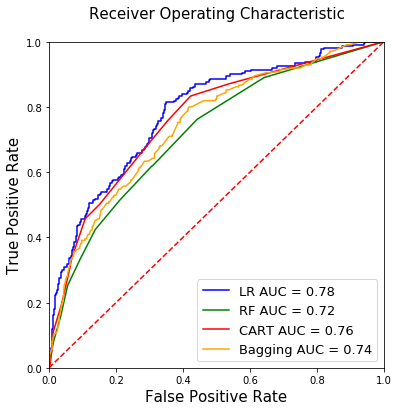

In [32]:
plt.rcParams['figure.figsize'] = (6, 6)
plt.title('Receiver Operating Characteristic\n', fontsize = 15)
plt.plot(LR_fpr, LR_tpr, 'b', label = 'LR AUC = %0.2f' % LR_roc_auc)
plt.plot(RF_fpr, RF_tpr, 'g', label = 'RF AUC = %0.2f' % RF_roc_auc)
plt.plot(CART_fpr, CART_tpr, 'r', label = 'CART AUC = %0.2f' % CART_roc_auc)
plt.plot(Bagging_fpr, Bagging_tpr, 'orange', label = 'Bagging AUC = %0.2f' %Bagging_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', fontsize =15)
plt.xlabel('False Positive Rate', fontsize = 15)
#plt.text(x = 0.41, y = 0.28, s='Logistic AUC = 0.79', fontsize = 15, color = 'b')
#plt.text(x = 0.4, y = 0.2, s='Severity AUC = 0.66', fontsize = 15, color = 'g')
plt.legend(fontsize = 13, loc = 'lower right')
plt.savefig('ROC_curve.png', bbox_inches='tight')
plt.show()

## vi

In [33]:
threshold_range = np.arange(0.1, 0.9, 0.01)
total_saving_log = []
for threshold in threshold_range:
    dataset['pred_label'] = np.where(y_proba > threshold, 1, 0)[:, 1]
 
    case1 = dataset[(dataset['readmit30'] == 1) & (dataset['pred_label'] == 1)].shape[0] * (8000 * 0.6 + 1200)
    case2 = dataset[(dataset['readmit30'] == 1) & (dataset['pred_label'] == 0)].shape[0] * 8000
    case3 = dataset[(dataset['readmit30'] == 0) & (dataset['pred_label'] == 1)].shape[0] * 1200
    
    total_cost = case1 + case2 + case3
    saving = status_quo - total_cost
    total_saving_log.append(saving)

saving_log_df = pd.DataFrame(columns = ['threshold', 'saving'])
saving_log_df['threshold'] = threshold_range
saving_log_df['saving'] = total_saving_log
saving_log_df.sort_values(['saving'], ascending=False).head()

ValueError: Length of values does not match length of index

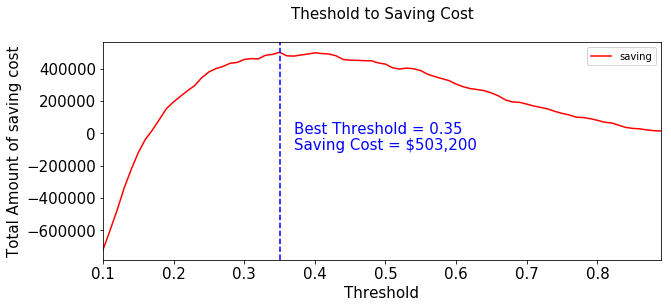

In [21]:
plt.rcParams['figure.figsize'] = (10, 4)
saving_log_df.plot(kind='line', x='threshold', y = 'saving', fontsize=15, color='r')
plt.axvline(x=0.35, color = 'b', linestyle='--')
plt.xlabel('Threshold', fontsize = 15)
plt.ylabel('Total Amount of saving cost', fontsize = 15)
plt.title('Theshold to Saving Cost\n', fontsize = 15)
plt.text(x = 0.37, y = 0, s='Best Threshold = 0.35', fontsize = 15, color = 'b')
plt.text(x = 0.37, y = -100000, s='Saving Cost = $503,200', fontsize = 15, color = 'b')
plt.savefig('Logistic_threshold.png', bbox_inches='tight')
plt.show()